In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [15]:
# Hyperparameters
BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 0.001
IMG_SIZE = 299  # Required for InceptionV3



In [16]:
# Data transformations
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [17]:
# Load dataset
dataset_path = "dataset/lung_cancer"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(pretrained=False)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 3)
)  # Adjust output layer for 3-class classification
model.to(device)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [19]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training Loop
def train_model():
    model.train()
    for epoch in range(EPOCHS):
        print("for epoch",epoch)
        running_loss = 0.0
        for images, labels in train_loader:
            print("for image")
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, aux_outputs = model(images)
            loss = criterion(outputs, labels) + criterion(aux_outputs, labels) * 0.4  # InceptionV3 auxiliary loss
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation


In [25]:
def evaluate_model():
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)[0]  # Get primary output from InceptionV3
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    print("Classification Report:\n", classification_report(all_labels, all_preds))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [21]:
# Run training and evaluation
train_model()


for epoch 0
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
Epoch 1/5, Loss: 0.8070
for epoch 1
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
for image
fo

In [27]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Get full output

            # Check if outputs is a tuple (for models like InceptionV3)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # Get the primary output

            # Ensure the output is of the expected shape
            if outputs.dim() == 2:  # Expected shape: [batch_size, num_classes]
                _, preds = torch.max(outputs, 1)
            else:
                print(f"Unexpected output shape: {outputs.shape}")
                continue  # Skip this batch if the shape is unexpected

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:\n", classification_report(all_labels, all_preds))

    # Plot Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return all_preds, all_labels  # Useful for further analysis


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       203
           1       0.98      0.93      0.95       194
           2       0.92      0.97      0.94       203

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



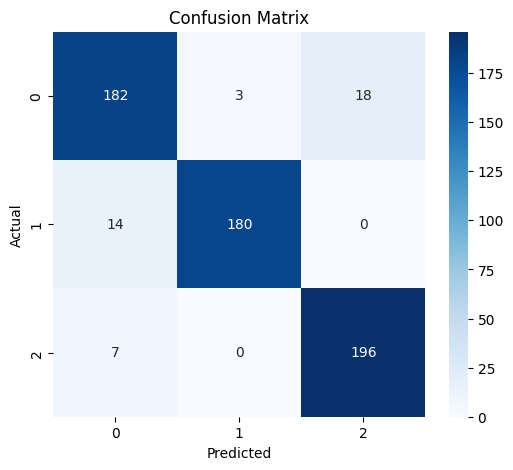

([np.int64(1),
  np.int64(2),
  np.int64(2),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(2),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(2),
  np.int64(1),
  np.int64(0),
  np.int64(2),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(0),
  np.int64(2),
  np.int64(1),
  np.int64(2),
  np.int64(2),
  np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(2),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(2),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(2),
  np.int64(2),
  np.int64(1),
  np.int64(2),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(0),
  np.int64

In [29]:
evaluate_model(model,test_loader,device)